### Isomap implementation

The algorithm is applied to the two image classification datasets: MNIST и Caltech-101.

The code for the data preprocessing is stored in `preprocess_datasets.ipynb`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.manifold import Isomap

### Datasets loading.

In [2]:
mnist_df = pd.read_csv('mnist_subset.csv')
mnist_features = [column for column in mnist_df.columns if column.startswith('pixel')]

caltech_df = pd.read_csv('caltech_101.csv')
caltech_features = [column for column in caltech_df.columns if column.startswith('pixel')]
print(np.unique(caltech_df.label.values))

['Faces' 'Faces_easy' 'Motorbikes' 'airplanes' 'watch']


In [3]:
mnist_df.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,3698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,27686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,34201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,6155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,29915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


### Standard implementation

In [11]:
time_start = time.time()
isomap = Isomap(n_components=2, eigen_solver='dense')
isomap_results = isomap.fit_transform(caltech_df[caltech_features])
print('isomap done! Time elapsed: {} seconds'.format(time.time()-time_start))

isomap done! Time elapsed: 16.85384488105774 seconds


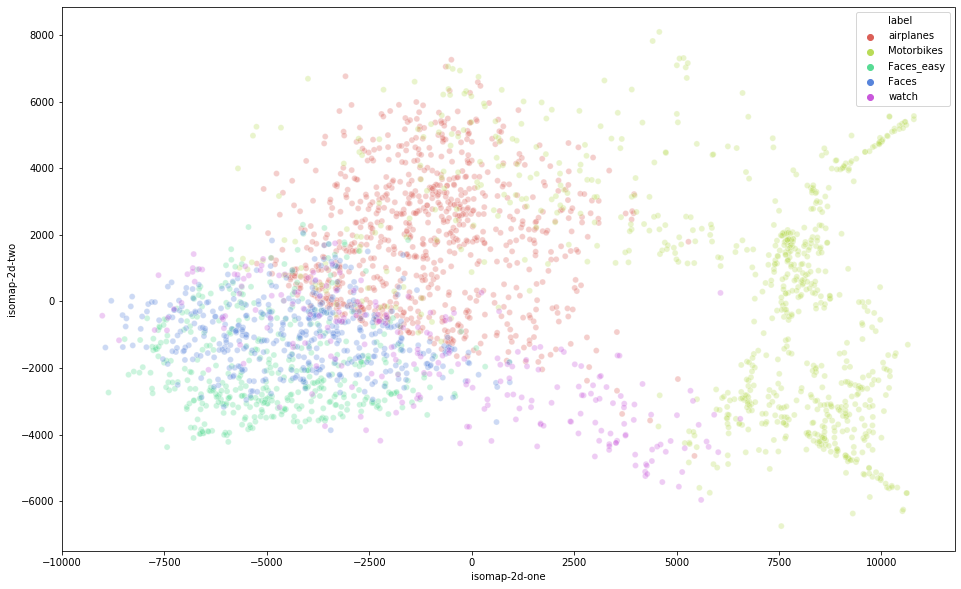

In [12]:
caltech_df['isomap-2d-one'] = isomap_results[:,0]
caltech_df['isomap-2d-two'] = isomap_results[:,1]

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="isomap-2d-one", y="isomap-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 5),
    data=caltech_df,
    legend="full",
    alpha=0.3
)

#### Custom implementation

In [20]:
def get_dist_matrix(vec_list):
    res = np.zeros((len(vec_list), len(vec_list)))
    
    for i in range(len(vec_list)):
        for j in range(len(vec_list)):
            res[i, j] = np.linalg.norm(vec_list[i] - vec_list[j])
    return res

def get_coords(vec_list, degree):
    n = len(vec_list)
    degree = min(degree, n)
    smart_dist = np.zeros((n, n))

    dist = distancematrix(vec_list)
    mean_pair_dist = np.sum(dist_matr ** 2) / (n**2)
    
    for i in range(length):
        for j in range(length):
            sum1 = dist[i, j] ** 2
            sum2 = 1.0 / n * np.dot(dist[i, :], dist[i, :])
            sum3 = 1.0 / n * np.dot(dist[:, j], dist[:, j])
            smart_dist[i, j] = -0.5 * (sum1 - sum2 - sum3 + mean_pair_dist)
 
    A, V = np.linalg.eig(smart_dist)
    list_idx = np.argpartition(A, degree - 1)[-degree:]
    a = np.diag(np.maximum(A[list_idx], 0.0))
    
    return np.matmul(V[:, list_idx], np.sqrt(a))

def dijkstra(dist, start):
    col = dist[start].copy()
    n = len(dist)
    visited_num = 0
    
    while visited_num < n:
        i = np.argpartition(col, 1)[1]
        length = dist[start][i]
        
        for j in range(count):
            if dist[start][j] > length + dist[i][j]:
                dist[start][j] = length + dist[i][j]
                dist[j][start] = dist[start][j]
                
        visited_num += 1
        col[i] = float('inf')

        
def isomap(vec_list, n_components):
    inf = float('inf')
    n = len(vec_list)
    
    mat_distance = get_dist_matrix(vec_list)
    print("# distance matrix is computed")
    knear = inf * np.ones((n, n))
    
    for i in range(n):
        topk = np.argpartition(mat_distance[i], n_components)[:n_components + 1]
        knear[i][topk] = mat_distance[i][topk]
    print("# k nearest neighbours are found")
        
    for start in range(n):
        dijkstra(knear, start)
    return get_coords(knear, target)

In [ ]:
time_start = time.time()
isomap_results = isomap(caltech_df[caltech_features].values, 2)
print('isomap done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
caltech_df['isomap-2d-one'] = isomap_results[:,0]
caltech_df['isomap-2d-two'] = isomap_results[:,1]

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="isomap-2d-one", y="isomap-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 5),
    data=caltech_df,
    legend="full",
    alpha=0.3
)